# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### Key Columns:
* month
* state (common between both)
* handgun
* long_gun
* multiple
* permit
* permit_recheck
* admin
* prepawn_handgun, prepawn_long_gun, prepawn_other
* redemption_handgun, redemption_long_gun, prepawn_other - The redeemed firearms in each column
* prepawn_handgun, prepawn_long_gun, prepawn_other - The pawned firearms in each column
* rentals_handgun, rentals_long_gun - The firearms rented in each category
* private_sale_handgun, private_sale_long_gun, private_sale_other - The private sales in each category
* return_to_seller_handgun, return_to_seller_long_gun, return_to_seller_other -  The firearms returned to sellers in each category
* totals - The total transactions for the month and state


### Question(s) for Analysis

#### 1. Is the total nations gun ownership increasing over time?
&
#### 2. What is the total amount of each subtype in reference to all other firearms?

### Is the total nations gun ownership increasing over time?

In [1]:
# To start, I’ll bring in the libraries (like pandas, numpy, matplotlib, seaborn) that I’ll need for handling, cleaning, and visualizing the data.
# Plan to use.
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

# Read the csv file and store into DataFrames

In [2]:
df_gun = pd.read_csv('Database_Ncis_and_Census_data/gun_data.csv')
df_cen = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')

# Inspecting DataTypes 

In [3]:
def df_info(df):
    print(df.shape)
    print(df.info())
    print(df.dtypes)
    print(df.duplicated().sum())
    print(df.isna().sum())

Creates a function that retrieves the shape, info, datatypes, amount of duplicates and nulls values of the DataFrames.

In [4]:
df_info(df_gun)

(12485, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 n

In [5]:
df_info(df_cen)

(85, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Ken

 Retrieves info by using the declared function above to learn more about the dataset, paying special attention to the amount of null values and duplicated works. After doing some investigation into the structure of the Dataframe, there is a ton of missing values and some duplicates that could be cleaned before analysis. In the following code cells, I'll be cleaning up the individual CSV's attempting to clean the info that we just obtained above. This'll help us in the end to merge the data.
    
# Data Cleaning


### Cleaning up Gun Data

In [6]:
# After discussing the structure of the data and any problems that need to be
# After reviewing the dataset, I noticed some issues, so here I’ll apply the cleaning steps we discussed.

# Some columns have more than 50% missing values, so I’m removing them to avoid unreliable analysis.
df_gun_clean = df_gun.dropna(thresh=df_gun.shape[0]*0.5, axis=1).copy()

# For the remaining missing values, I’ll replace them with 0 to maintain numerical consistency.
df_gun_clean.loc[:,:] = df_gun_clean.fillna(0)

# The state names need to be standardized so that merging and comparisons across datasets remain consistent.
df_gun_clean['state'] = df_gun_clean['state'].str.strip().str.title()

The first code line shows me dropping individual columns with more than 50% missing values
Second I try to fill the remaining values with 0 so that null values dont show up anymore.
Third I standardize the state column for consistency because it will be the merge between
the census data and gun data

### Cleaning up Census Data

In [7]:
# Here I’ll keep only the rows where the 'Fact' column has valid entries, since those are relevant for analysis.
df_cen.dropna(subset=['Fact'], inplace=True)
# I’m transposing the census dataframe to better align rows and columns for analysis.
df_cen_clean = df_cen.set_index('Fact').transpose()
# Resetting the index so that 'state' becomes a column, making it easier to manipulate later.
df_cen_clean.reset_index(inplace=True)
# Renaming the columns to be more descriptive and easier to interpret.
df_cen_clean.rename(columns={'index':'state'}, inplace=True)
# Standardize the 'state' column for consistency
df_cen_clean['state'] = df_cen_clean['state'].str.strip().str.title()

Theres a extraneous column called 'Fact', if we reflect the census dataframe with 
tranpose we can reset the index and make a state column. Then we reset the index by renaming it to our 'state' column for clarity. Then we standardized the column for consistency for a later merge.

### Merging The Datasets

In [8]:
# Now I’ll merge the datasets so the information is combined for a more complete picture.
df_merged = pd.merge(df_gun_clean, df_cen_clean, on='state', how='inner')

# Converting the 'month' column to a datetime format so I can extract the year and analyze trends over time.
df_merged['month'] = pd.to_datetime(df_merged['month'])
df_merged['year'] = df_merged['month'].dt.year

# Gathering the gun-related columns together and creating a copy to work with them directly.
ownership = ['permit', 'handgun', 'long_gun', 'multiple']
df_clean = df_merged[['month', 'year'] + ownership].copy()

# For the remaining missing values, I’ll replace them with 0 to maintain numerical consistency.
df_clean.loc[:, ownership] = df_clean[ownership].fillna(0)

# Adding a new column that sums ownership figures to track the overall totals.
df_clean['total_ownership'] = df_clean[ownership].sum(axis=1)
df_clean.to_csv('clean_merge.csv')

We merge the datasets now using the column as an inner join so we only include
the matching values inside our new merged dataset. We're still going to have to clean up this dataset as well but now it'll all be in one place! This will make it easier to answer our questions! Focusing on all the relevant columns, we replace their missing values with 0. Finally adding their total_ownership per state to a column.

In [9]:
yearly_totals = df_clean.groupby('year')['total_ownership'].sum()
yearly_change = yearly_totals.diff()
sum_firearm_types = df_clean.groupby('year')[ownership].sum()
sum_firearm_types['total'] = sum_firearm_types.sum(axis=1)
firearm_type_proportaations = sum_firearm_types.div(sum_firearm_types['total'], axis =0).drop(columns=['total'])

Now we perform a yearly aggregation by year and the total ownership column we just created. This will allow us to easily compute the differences in yearly spikes. Then we calculate the proportions by firearm type and add a total column for said proportions. This'll help us under the proportions for each firearm type.

<a id='eda'></a>
# Exploratory Data Analysis

The key variables explored throughout these datasets has to be the month, state, and permit, handgun, long_gun, multiple which all could be a sum of total gun ownership. To determine the trends of total firearm ownership over time, this can be done by aggregating by time. Then we want to visualize trends in highlighting any unsual peaks during the dataset.

### Is the total nations gun ownership increasing over time?

<Axes: xlabel='Year', ylabel='Total Ownerhip'>

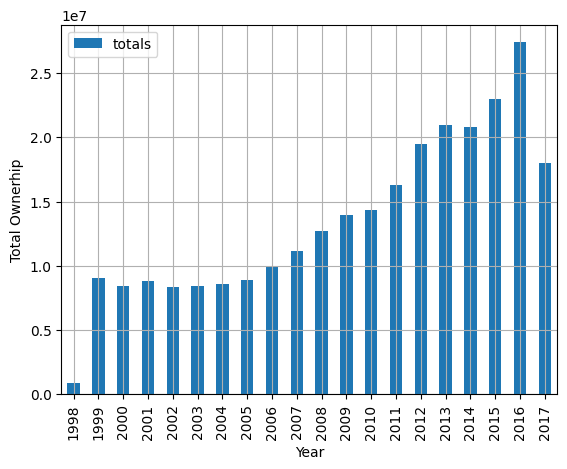

In [11]:
yearly_totals = df_merged.groupby('year')['totals'].sum()

yearly_totals.plot(
    x=yearly_totals.values,
    y=yearly_totals.index,
    kind='bar',
    xlabel='Year', 
    ylabel='Total Ownerhip', 
    grid=True,
    legend=True
)
# This section demonstrates a univariate analysis—looking at the distribution of a single variable.

    This graph is an example of using Univariate data, it helps us to clearly indicates the trend of total ownership of firearms throughout the years, the x axis indicates the amount of years while the y axis indicates the total ownership throughout each year. Each bar on the graph indicates the total sum of firearms throughout that year. It can be seen total gun-ownership over the years have gone up exponentially, the only outliers being the first and last year of the period. 

### What is the total amount of each subtype in reference to all other firearms?

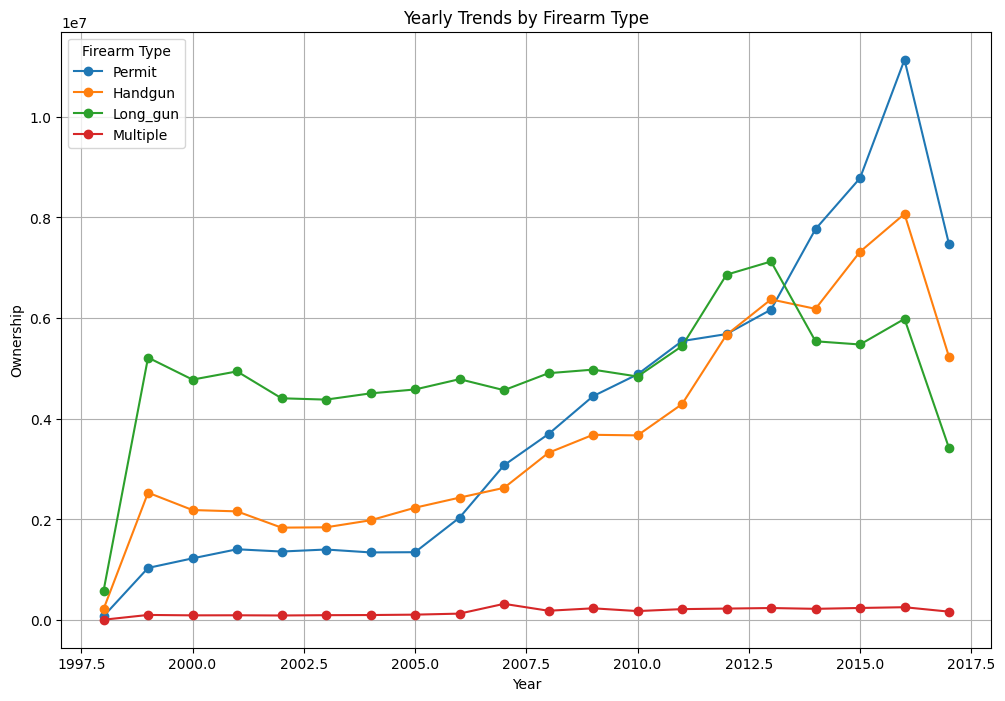

In [12]:
plt.figure(figsize=(12, 8))
for column in ownership:
    plt.plot(sum_firearm_types.index, sum_firearm_types[column], marker='o', label=column.capitalize())
plt.title('Yearly Trends by Firearm Type')
plt.xlabel('Year')
plt.ylabel('Ownership')
plt.legend(title='Firearm Type')
plt.grid()
plt.show()

# Here I’ll move on to multivariable analysis, examining how multiple variables relate to each other.

    This graph is in example of Bivariate data, it helps us to clearly indicate the trends of total gun ownership for each type of gun of the US census overall throughout the years, we can clearly see that certain gun categories like permit and handgun dominate in terms of growth throughout the years. It can also be seen that the multiple category is steadily stagnant throughout the years with a slight jump between 2005-2007.

<a id='conclusions'></a>
# Conclusions
    Overtime, firearm ownership has increased steadily over time, this is likely due to factors such as the political climate or societal events that are common throughout a American citizen's living domestically. Handguns and permits are the most dominate trends, longuns remain stagnant over time with an eventual decline. The yearly changes in ownership highlights the periods of high increases and descreases. In conclusion, the growing trend of permit-based ownership of handguns gives us insight into the climate of the US census today.
    
## Question 1 : Is the total nations gun ownership increasing over time?
    Up until 2017 total gun ownership trend was on the rise, then the trend falls down as it seems that there was a sharp decline in ownership. However overall it indicates a growing prevalence of firearm registrations. Some factors may drive this growth such as political turbulence and economic trends, I'm curious to see what a more current dataset would have to offer to correlate to recent news. 

## Question 2 : Are certain years experiencing spikes in ownership?
    Certain years like 199 and 2017 showed signficant spikes in ownership. Researching a link in history, focusing on 1999 and 2017 to see why the trends are so drastic. Clearly after the 2007's gun ownership trends significantly increase, this can be correlated to the socio-political climate that Americans live in today.



## Limitations

    One limitation would have to the population estimate accuracy. A lot of the states had confidential or other covered info, in a perfect world you have all the data clean and ready to go.

